In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 10 02:37:14 2020

@author: fguan
"""

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

epoch = 4
lr = 0.01
batch_size_train = 64
batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/home/fguan', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/home/fguan', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_test, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 784 * 2)
        self.fc2 = nn.Linear(784 * 2, 2000)
        self.fc3 = nn.Linear(2000, 2000)
        self.fc4 = nn.Linear(2000, 1000)
        self.fc5 = nn.Linear(1000, 50)
        self.fc6 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        torch.nn.Dropout()
        x = F.relu(self.fc2(x))
        torch.nn.Dropout()
        x = F.relu(self.fc3(x))
        torch.nn.Dropout()
        x = F.relu(self.fc4(x))
        torch.nn.Dropout()
        x = self.fc5(x)
        torch.nn.Dropout()
        x = self.fc6(x)
        return F.log_softmax(x)

def train(epoch, net):
    for i in range(epoch):
        optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
        loss = nn.CrossEntropyLoss()
        for i, (image, target) in enumerate(train_loader):
            image = torch.reshape(image, (-1, 784))
            prediction = net.forward(image).cuda()
            optimizer.zero_grad()
            l = loss(prediction, target.cuda())
            l.backward()
            optimizer.step()
            plt.plot(i, l.item(), 'ro')
        
def test(net):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
    loss = nn.CrossEntropyLoss()
    for i, (image, target) in enumerate(train_loader):
        image = torch.reshape(image, (-1, 784))
        prediction = net.forward(image)
        l = loss(prediction, target)
        plt.plot(i, l.item(), 'go')
        

<ipython-input-10-3169931d53e2>:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


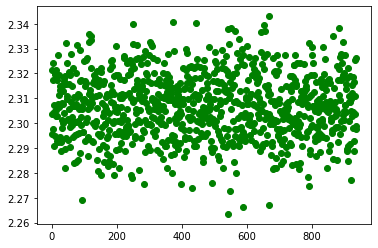

In [11]:
net = Net()
test(net)

<ipython-input-10-3169931d53e2>:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


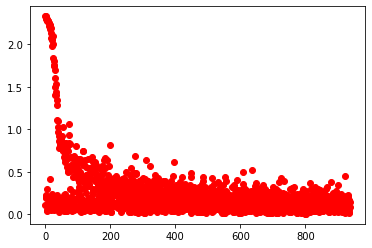

In [12]:
train(2, net)

<ipython-input-10-3169931d53e2>:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


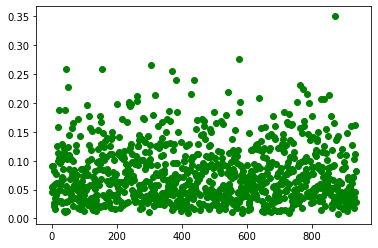

In [13]:
test(net)